In [19]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv("slr12.csv", sep=";")
data.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [9]:
data.shape

(36, 2)

In [17]:
X = data.iloc[:, 0].values #coluna FrqAnual - Variável independente
y = data.iloc[:, 1].values #coluna CusInic - Variável independente

In [22]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [36]:
#matriz
X = X.reshape(-1, 1)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
#Criação do modelo e treinamento
modelo= LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [55]:
#Criação do modelo de Regressão Linear utilizando a biblioteca statsmodels
#R^2 ajustado = Adj.R-squared
modelo_ajustado = sm.ols(formula = 'CusInic ~ FrqAnual', data = data)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CusInic   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Thu, 13 Apr 2023   Prob (F-statistic):            0.00327
Time:                        20:35:54   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
FrqAnual       0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Interceptação e inclinação(coeficiente angular)
print(modelo.intercept_)
print(modelo.coef_)

867.6042222620559
[0.37315794]


In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Investimento Inicial')

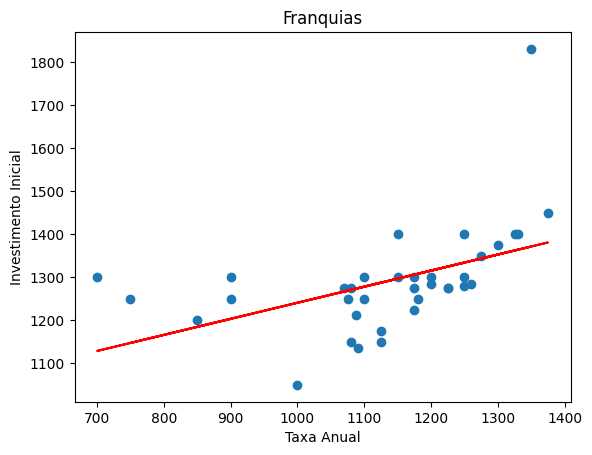

In [45]:
#Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color ='red')
plt.title('Franquias')
plt.xlabel('Taxa Anual')
plt.ylabel('Investimento Inicial')

In [46]:
#avaliando o R^2(Coeficiente de Determinação)
modelo.score(X,y)

0.2275359181555099

In [58]:
#previsão de custo inicial com base na taxa anual
modelo.predict([[1300]])

array([1352.70953897])

In [48]:
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm

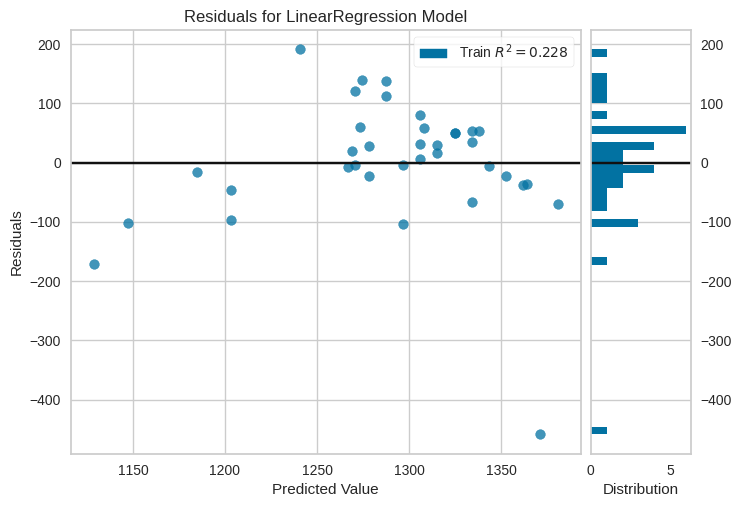

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
#Gráfico para visualizar os residuos(distancia entre os dados e os valores ajustado(linha))
#Analise da distribuição dos dados
residuos = ResidualsPlot(modelo)
residuos.fit(X, y)
residuos.poof() 

correlação positiva moderada / coeficiente de determinação *baixo*